In [14]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

conn = pymysql.connect(
    host= 'localhost',
    port=3306,
    user='root',
    password='root',
    db='shopping'
)

cur = conn.cursor()

In [15]:
''' **Column List**
Customer_ID: 각 개별 고객에게 할당된 고유 식별자로, 시간에 따른 쇼핑 행동 추적과 분석을 용이하게 함
Age: 고객의 나이로, 세분화 및 대상 마케팅 전략에 대한 인구 통계 정보를 제공
Gender: 고객의 성별 식별로, 제품 선호도와 구매 패턴에 영향을 주는 주요 인구 통계 변수
Item_Purchased: 거래 중에 고객이 선택한 특정 제품 또는 항목
Category: 구매한 항목이 속하는 대분류 또는 그룹
Purchase_Amount: 거래의 통화 가치로, 미국 달러(USD)로 표시되며, 구매한 상품의 비용
Location: 구매가 이루어진 지리적 위치로, 지역 선호도와 시장 동향에 대한 통찰력을 제공
Size: 구매한 항목의 사이즈 사양(해당하는 경우)으로, 의류, 신발 및 일부 소비재에 관련이 있음
Color: 구매한 항목과 관련된 색상 변형 또는 선택으로, 고객 선호도와 제품 가용성에 영향을 줌
Season: 구매한 항목의 계절적인 적합성(예: 봄, 여름, 가을, 겨울)으로, 재고 관리와 마케팅 전략에 영향을 줌
Review_Rating: 고객이 구매한 항목에 대한 수치적 또는 정성적 평가로, 구매한 항목에 대한 만족도를 나타냄
Subscription_Status: 고객이 구독 서비스를 선택했는지 여부를 나타내며, 충성도 수준과 반복 수익 가능성에 대한 통찰력을 제공
Shipping_Type: 구매한 항목을 배송하기 위해 사용된 방법을 지정하며(예: 표준 배송, 특급 배송), 배송 시간과 비용에 영향
Discount_Applied: 구매에 프로모션 할인이 적용되었는지 여부를 나타내며, 가격 민감도와 프로모션 효과에 대한 정보를 제공
Promo_Code_Used: 거래 중에 프로모션 코드 또는 쿠폰이 사용되었는지 여부를 기록하여 마케팅 캠페인의 성공을 평가하는 데 도움을 줌
Previous_Purchases: 고객이 이전에 얼마나 자주 구매를 했는지 또는 구매 횟수에 대한 정보로, 고객 세분화와 유지 전략에 기여
Payment_Method: 고객이 사용한 결제 방식을 지정하며(예: 신용카드, 현금), 선호하는 결제 옵션에 대한 통찰력을 제공
Frequency_of_Purchases: 고객이 구매 활동을 얼마나 자주하는지를 나타내며, 고객 충성도와 평생 가치를 평가하는 데 중요한 지표

'''

sql = "select * from shopping_trends"
cur.execute(sql)

result = cur.fetchall()
df = pd.DataFrame(result)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [16]:
# 계절(Season) 별로 어떤 카테고리(Category)가 더 많이 팔렸는지를 보고
#   특정 시즌에는 무엇을 파는 것이 좋을 것 같다는 결론을 도출하는 방법

In [17]:
# 기초 테이블 정의
pri_table = '''
    with pri_table as (
        select
            Category C,
            Season as S,
            Color,
            Purchase_Amount as PA,
            Previous_Purchases as PP,
            Frequency_of_Purchases as FP
        from
            shopping_trends as shopping
        order by
            Category
    )
'''

In [18]:
sql = '''
    select
        S, C,
        AVG(PA) as average_PA,
        SUM(PA) as sum_PA,
        AVG(PP) as average_PP,
        SUM(PP) as sum_PP,
        count(FP) as count_FP
    from
        pri_table
    group by
        S, C
    order by
        1
'''
cur.execute(pri_table + sql)

result = cur.fetchall()

df = pd.DataFrame(result)
df


,0,1,2,3,4,5,6
0,Fall,Accessories,61.3395,19874,24.6512,7987,324
1,Fall,Clothing,61.4052,26220,25.4543,10869,427
2,Fall,Footwear,63.7132,8665,24.5882,3344,136
3,Fall,Outerwear,59.7614,5259,24.3864,2146,88
4,Spring,Accessories,56.5017,17007,25.9435,7809,301
5,Spring,Clothing,60.9956,27692,24.7599,11241,454
6,Spring,Footwear,58.6196,9555,24.1656,3939,163
7,Spring,Outerwear,54.6296,4425,25.9506,2102,81
8,Summer,Accessories,60.9872,19028,26.8045,8363,312
9,Summer,Clothing,56.5637,23078,24.4608,9980,408


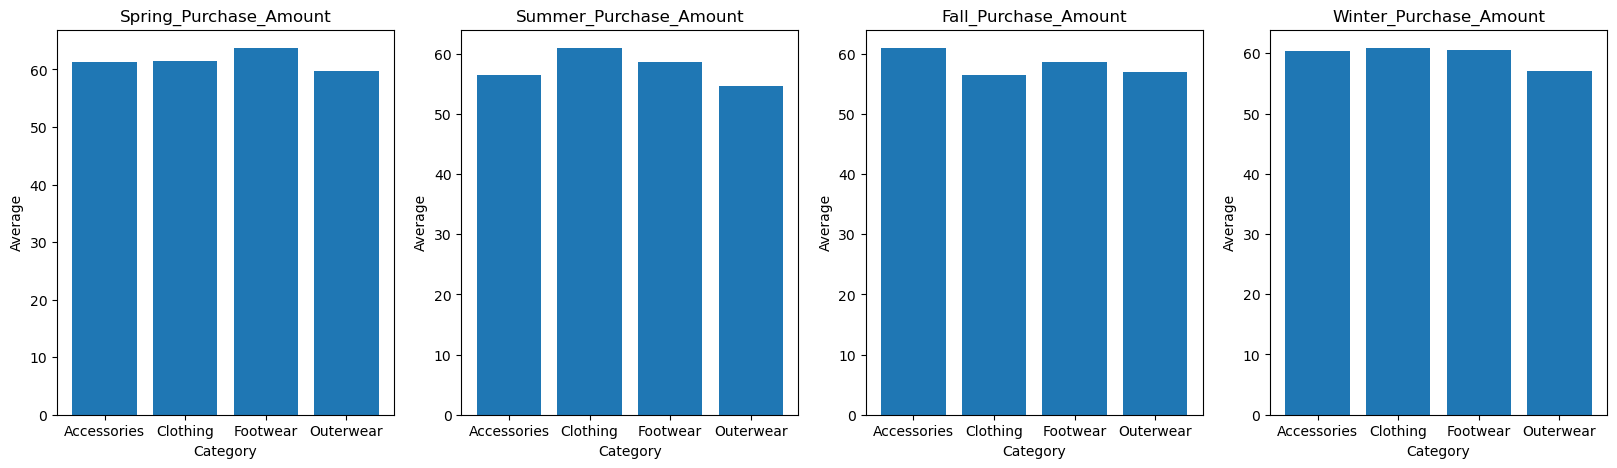

In [19]:
# 시각화 - 금액 평균
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
categories = ['Accessories', 'Clothing', 'Footwear', 'Outerwear']

fig, axes = plt.subplots(1, 4, figsize = (20, 5))

axes[0].bar(categories, df[2][:4])
axes[0].set_title('Spring_Purchase_Amount')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Average')
axes[1].bar(categories, df[2][4:8])
axes[1].set_title('Summer_Purchase_Amount')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Average')
axes[2].bar(categories, df[2][8:12])
axes[2].set_title('Fall_Purchase_Amount')
axes[2].set_xlabel('Category')
axes[2].set_ylabel('Average')
axes[3].bar(categories, df[2][12:16])
axes[3].set_title('Winter_Purchase_Amount')
axes[3].set_xlabel('Category')
axes[3].set_ylabel('Average')

plt.show()

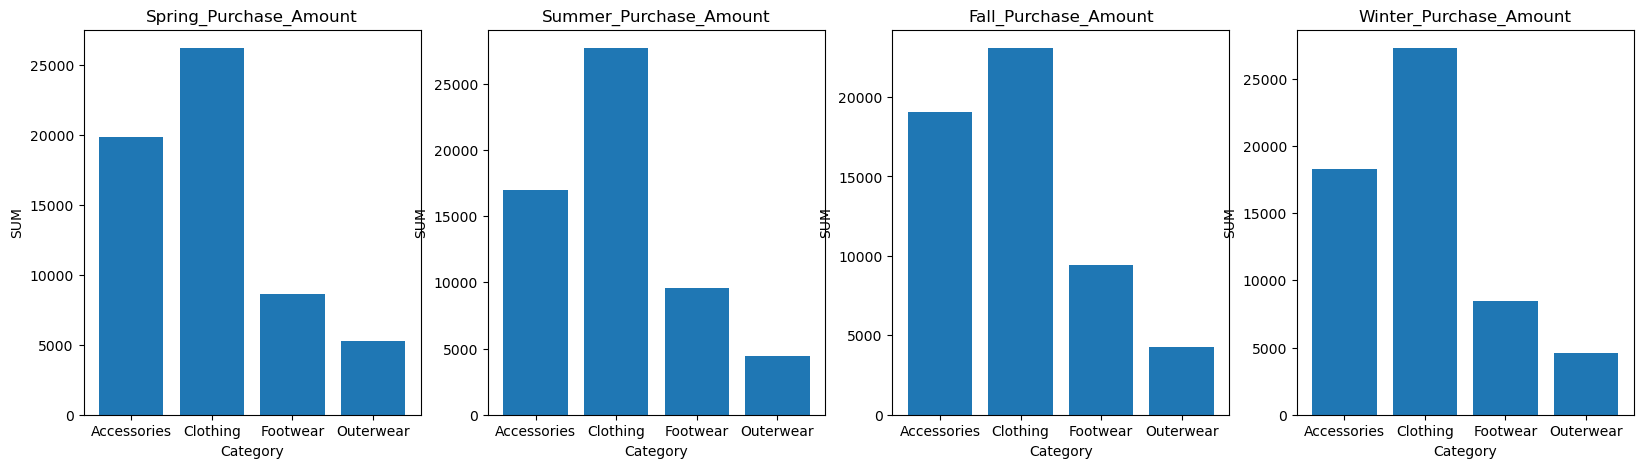

In [22]:
# 시각화 - 금액 합계
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
categories = ['Accessories', 'Clothing', 'Footwear', 'Outerwear']

fig, axes = plt.subplots(1, 4, figsize = (20, 5))

axes[0].bar(categories, df[3][:4])
axes[0].set_title('Spring_Purchase_Amount')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('SUM')
axes[1].bar(categories, df[3][4:8])
axes[1].set_title('Summer_Purchase_Amount')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('SUM')
axes[2].bar(categories, df[3][8:12])
axes[2].set_title('Fall_Purchase_Amount')
axes[2].set_xlabel('Category')
axes[2].set_ylabel('SUM')
axes[3].bar(categories, df[3][12:16])
axes[3].set_title('Winter_Purchase_Amount')
axes[3].set_xlabel('Category')
axes[3].set_ylabel('SUM')

plt.show()

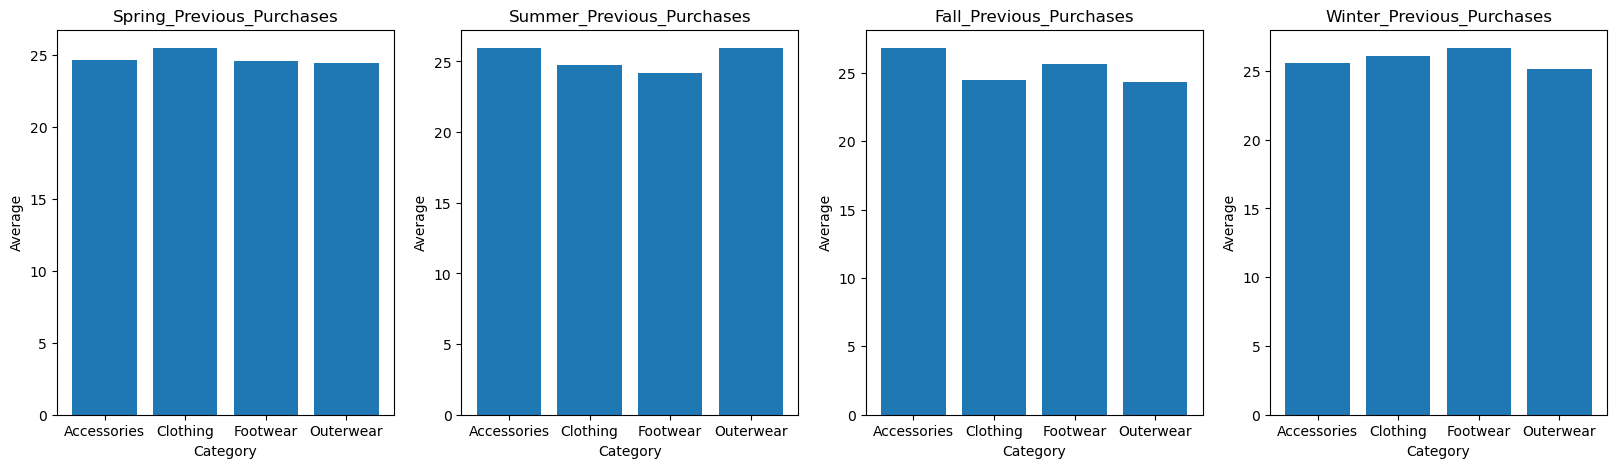

In [23]:
# 시각화 - 계절 별 이전에 구매한 경험 평균
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
categories = ['Accessories', 'Clothing', 'Footwear', 'Outerwear']

fig, axes = plt.subplots(1, 4, figsize = (20, 5))

axes[0].bar(categories, df[4][:4])
axes[0].set_title('Spring_Previous_Purchases')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Average')
axes[1].bar(categories, df[4][4:8])
axes[1].set_title('Summer_Previous_Purchases')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Average')
axes[2].bar(categories, df[4][8:12])
axes[2].set_title('Fall_Previous_Purchases')
axes[2].set_xlabel('Category')
axes[2].set_ylabel('Average')
axes[3].bar(categories, df[4][12:16])
axes[3].set_title('Winter_Previous_Purchases')
axes[3].set_xlabel('Category')
axes[3].set_ylabel('Average')

plt.show()

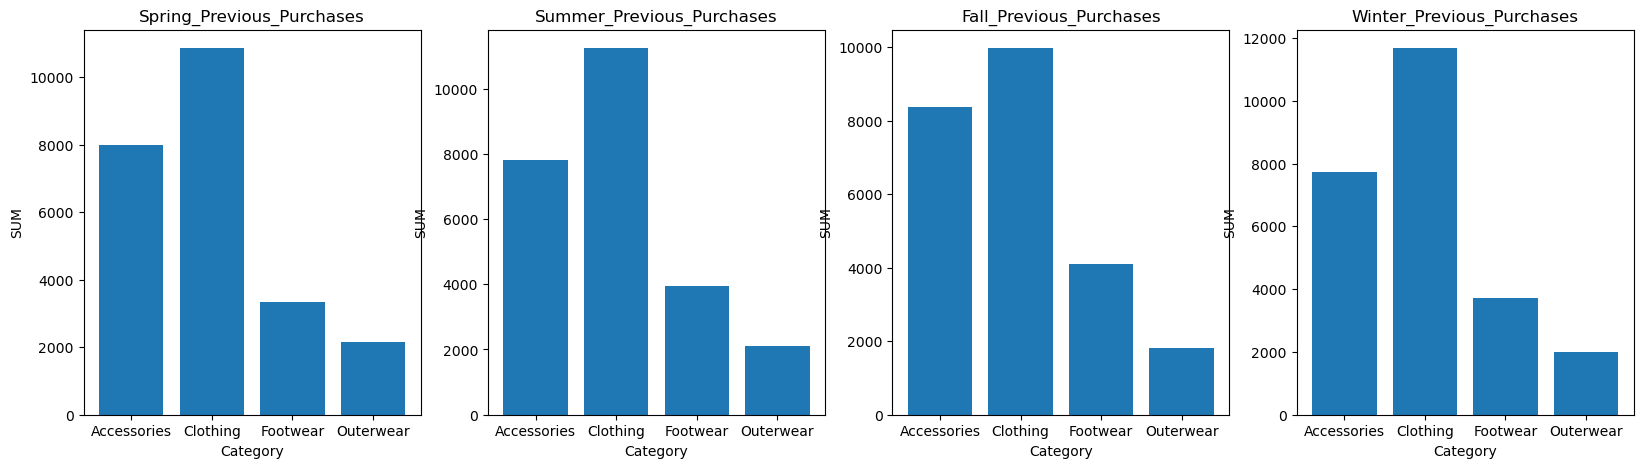

In [24]:
# 시각화 - 계절 별 이전에 구매한 경험 합계
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
categories = ['Accessories', 'Clothing', 'Footwear', 'Outerwear']

fig, axes = plt.subplots(1, 4, figsize = (20, 5))

axes[0].bar(categories, df[5][:4])
axes[0].set_title('Spring_Previous_Purchases')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('SUM')
axes[1].bar(categories, df[5][4:8])
axes[1].set_title('Summer_Previous_Purchases')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('SUM')
axes[2].bar(categories, df[5][8:12])
axes[2].set_title('Fall_Previous_Purchases')
axes[2].set_xlabel('Category')
axes[2].set_ylabel('SUM')
axes[3].bar(categories, df[5][12:16])
axes[3].set_title('Winter_Previous_Purchases')
axes[3].set_xlabel('Category')
axes[3].set_ylabel('SUM')

plt.show()

In [12]:
## 두 번째 가설 인사이트 정리
'''
1. 계절 별로 어떤 카테고리가 더 많이 팔렸는가?
 -> 합계로 보면 의류(Clothing)가 많이 팔렸지만, 평균 금액으로는 카테고리 별로 큰 상관은 없다.

2. 계절 별로 어떤 카테고리를 더 많이 이전에 구매했나?
 -> 1번과 같다. 의류를 구매하는 사람이 많아 그런 것 같다.
 
3. 의외
 -> 악세서리가 가을, 겨울에 더 많이 팔렸다. 특정 행사가 많아서 그런가(명절, 크리스마스, 연말, 새해)?

'''

'\n1. 계절 별로 어떤 카테고리가 더 많이 팔렸는가?\n -> 합계로 보면 의류(Clothing)가 많이 팔렸지만, 평균 금액으로는 카테고리 별로 큰 상관은 없다.\n\n2. 계절 별로 어떤 카테고리를 더 많이 이전에 구매했나?\n -> 1번과 같다. 의류를 구매하는 사람이 많아 그런 것 같다.\n \n3. 의외\n -> 악세서리가 가을, 겨울에 더 많이 팔렸다. 특정 행사가 많아서 그런가(명절, 크리스마스, 연말, 새해)?\n\n'